### Configurações do Projeto

In [21]:
import kagglehub
import pandas as pd
import numpy as np
from kagglehub import KaggleDatasetAdapter
import os
import matplotlib.pyplot  as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [2]:
sns.set_style("whitegrid")       # fundo claro com grades suaves
sns.set_context("notebook")      # tamanho de fonte apropriado
sns.set_palette("viridis")         # usa tons de azul para todos os gráficos

# Define também a cor base do matplotlib para títulos, eixos, etc.
plt.rcParams.update({
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'axes.titlepad': 15,
    'axes.labelpad': 10
})


In [3]:
# Baixar o dataset na pasta atual
path = kagglehub.dataset_download(
    "ricardogeorgeam/base-de-dados-recursos-humanos-rh",
)

In [4]:
arquivo = os.listdir(path)
nome_arquivo = arquivo[0]
caminho_arquivo = os.path.join(path, nome_arquivo)

df = pd.read_excel(caminho_arquivo)
dfCopy = df

### Estrutura dos dados

In [5]:
dfCopy.head(10)

,Nome do funcionário,IDFuncionario,IDCasado,IDStatusConjulgal,IDGenero,IDStatusFuncionario,IDepartamento,IDPontuacaoDesempenho,IDRecrutamentoDiversidade,Salario,...,Nome Gestor,IDGestor,Fonte de recrutamento,Avaliacao Desempenho,Pesquisa Engajamento,Satisfação Funcionario,Contagem de Projetos Especiais,DataUltimoFeedback,UltimoAtrasoUltimos30dias,Ausências
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Excede,460,Muito Satisfeito,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Atende totalmente,496,Neutro,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Atende totalmente,302,Neutro,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Atende totalmente,484,Muito Satisfeito,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Pesquisa Google,Atende totalmente,500,Satisfeito,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Excede,500,Muito Satisfeito,0,1/7/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,Alex Sweetwater,10.0,LinkedIn,Atende totalmente,304,Neutro,4,1/2/2019,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,...,Ketsia Liebig,19.0,Indicação de funcionários,Atende totalmente,500,Satisfeito,0,2/25/2019,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,...,Brannon Miller,12.0,Feira de Empregos de Diversidade,Atende totalmente,446,Neutro,0,1/25/2019,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,...,Peter Monroe,7.0,Indeed,Atende totalmente,500,Muito Satisfeito,6,2/18/2019,0,16


In [6]:
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Nome do funcionário             311 non-null    object 
 1   IDFuncionario                   311 non-null    int64  
 2   IDCasado                        311 non-null    int64  
 3   IDStatusConjulgal               311 non-null    int64  
 4   IDGenero                        311 non-null    int64  
 5   IDStatusFuncionario             311 non-null    int64  
 6   IDepartamento                   311 non-null    int64  
 7   IDPontuacaoDesempenho           311 non-null    int64  
 8   IDRecrutamentoDiversidade       311 non-null    int64  
 9   Salario                         311 non-null    int64  
 10  IDesligado                      311 non-null    int64  
 11  IDCargo                         311 non-null    int64  
 12  Cargo                           311 

In [7]:
dfCopy.columns

Index(['Nome do funcionário', 'IDFuncionario', 'IDCasado', 'IDStatusConjulgal',
       'IDGenero', 'IDStatusFuncionario', 'IDepartamento',
       'IDPontuacaoDesempenho', 'IDRecrutamentoDiversidade', 'Salario',
       'IDesligado', 'IDCargo', 'Cargo', 'Estado', 'CEP', 'ANIV', 'Sexo',
       'EstadoCivil', 'Cidadania', 'Latino', 'Raca', 'Data Contratação',
       'Data Rescisão', 'MotivRecisao', 'SituaçãoEmprego', 'Departamento',
       'Nome Gestor', 'IDGestor', 'Fonte de recrutamento',
       'Avaliacao Desempenho', 'Pesquisa Engajamento',
       'Satisfação Funcionario', 'Contagem de Projetos Especiais',
       'DataUltimoFeedback', 'UltimoAtrasoUltimos30dias', 'Ausências'],
      dtype='object')

In [8]:
dfCopy['ANIV']

0      07/10/83
1      05/05/75
2      09/19/88
3      09/27/88
4      09/08/89
         ...   
306    05/11/85
307    05/04/82
308    08/30/79
309    02/24/79
310    08/17/78
Name: ANIV, Length: 311, dtype: object

---

# 🎯 Objetivo do Projeto

*Compreender fatores que impactam a retenção de talentos e a eficiência organizacional.*


- Motivos da alta rotatividade em alguns departamentos  
- Diferenças significativas de desempenho entre funcionários  
- Impacto da diversidade e recrutamento nas taxas de retenção


---

## Alta Rotatividade em alguns departamentos

### Visão Geral

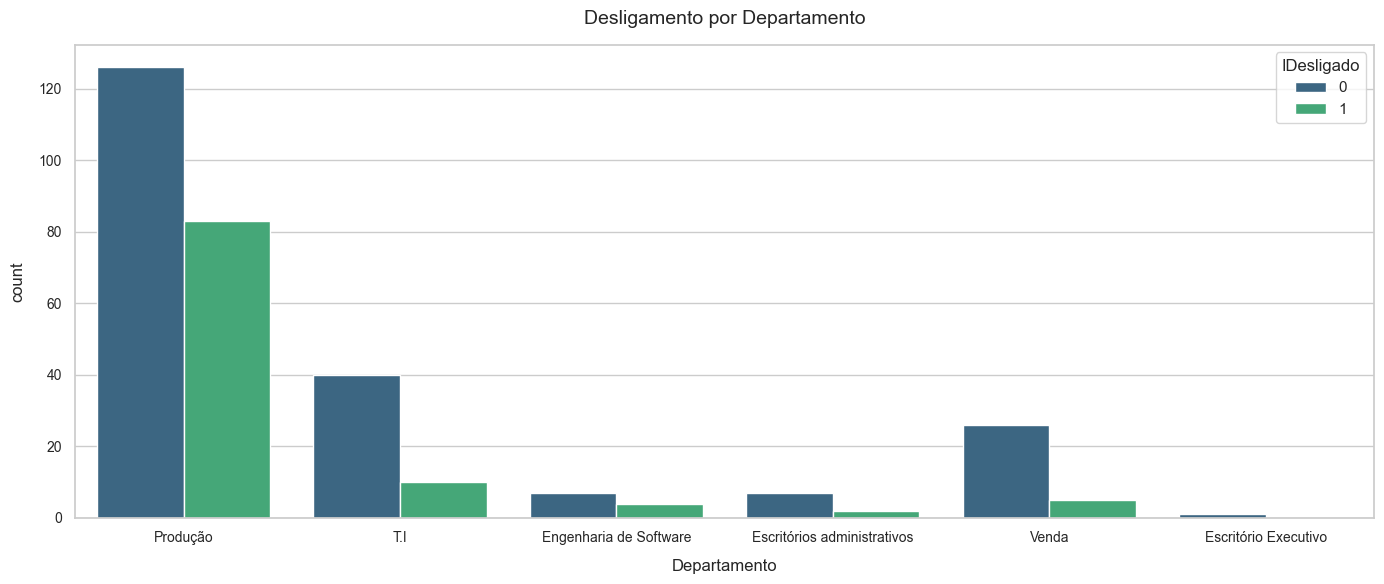

In [9]:
fig, axes = plt.subplots(figsize=(14, 6)) 

sns.countplot(data=dfCopy, x='Departamento', hue='IDesligado',palette='viridis', ax=axes)
axes.set_title('Desligamento por Departamento')
axes.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

C:\Users\compu\AppData\Local\Temp\ipykernel_18584\3886553495.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dfCopy, x='Departamento', y='Salario', estimator='mean', palette='viridis_r', ax=axes[0],ci=None)
C:\Users\compu\AppData\Local\Temp\ipykernel_18584\3886553495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dfCopy, x='Departamento', y='Salario', estimator='mean', palette='viridis_r', ax=axes[0],ci=None)


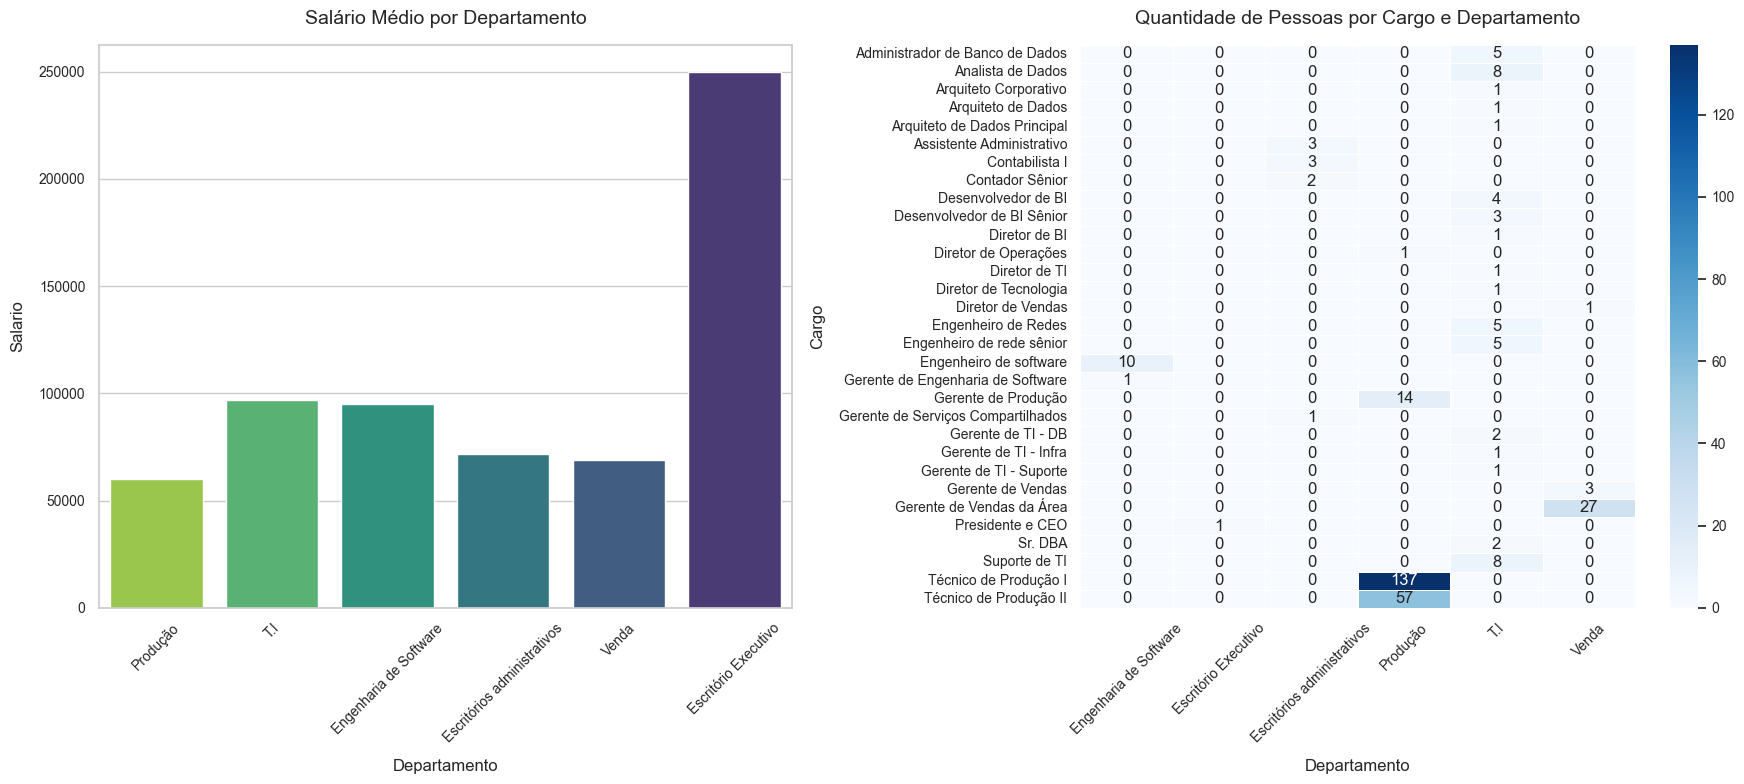

In [10]:
fig, axes = plt.subplots(1,2,figsize=(18, 8))  
sns.barplot(data=dfCopy, x='Departamento', y='Salario', estimator='mean', palette='viridis_r', ax=axes[0],ci=None)
axes[0].set_title('Salário Médio por Departamento')
axes[0].tick_params(axis='x', rotation=45)

tabela_contagem = dfCopy.pivot_table(
    index='Cargo',
    columns='Departamento',
    aggfunc='size',  # conta a quantidade de ocorrências
    fill_value=0     # preenche os vazios com zero
)
sns.heatmap(tabela_contagem, annot=True, fmt="d", ax=axes[1], cmap="Blues", linewidths=0.5)
axes[1].set_title('Quantidade de Pessoas por Cargo e Departamento')
axes[1].tick_params(axis='x', rotation=45)
plt.xlabel('Departamento')
plt.ylabel('Cargo')


plt.tight_layout()
plt.show()

C:\Users\compu\AppData\Local\Temp\ipykernel_18584\3121192588.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dfCopy, x='Departamento', y='Ausências', estimator=np.sum, ax=axes[0,0],ci=None, palette='viridis_r')
C:\Users\compu\AppData\Local\Temp\ipykernel_18584\3121192588.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dfCopy, x='Departamento', y='Ausências', estimator=np.sum, ax=axes[0,0],ci=None, palette='viridis_r')
C:\Users\compu\AppData\Local\Temp\ipykernel_18584\3121192588.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dfCopy, x='Departamento', y='Pesquisa Engajamento', palette='viridis_r', estimator='mean', ax=axes[1,0],ci=None)
C:\Users\compu\AppData\Local\Temp\ipykernel_18584\31211

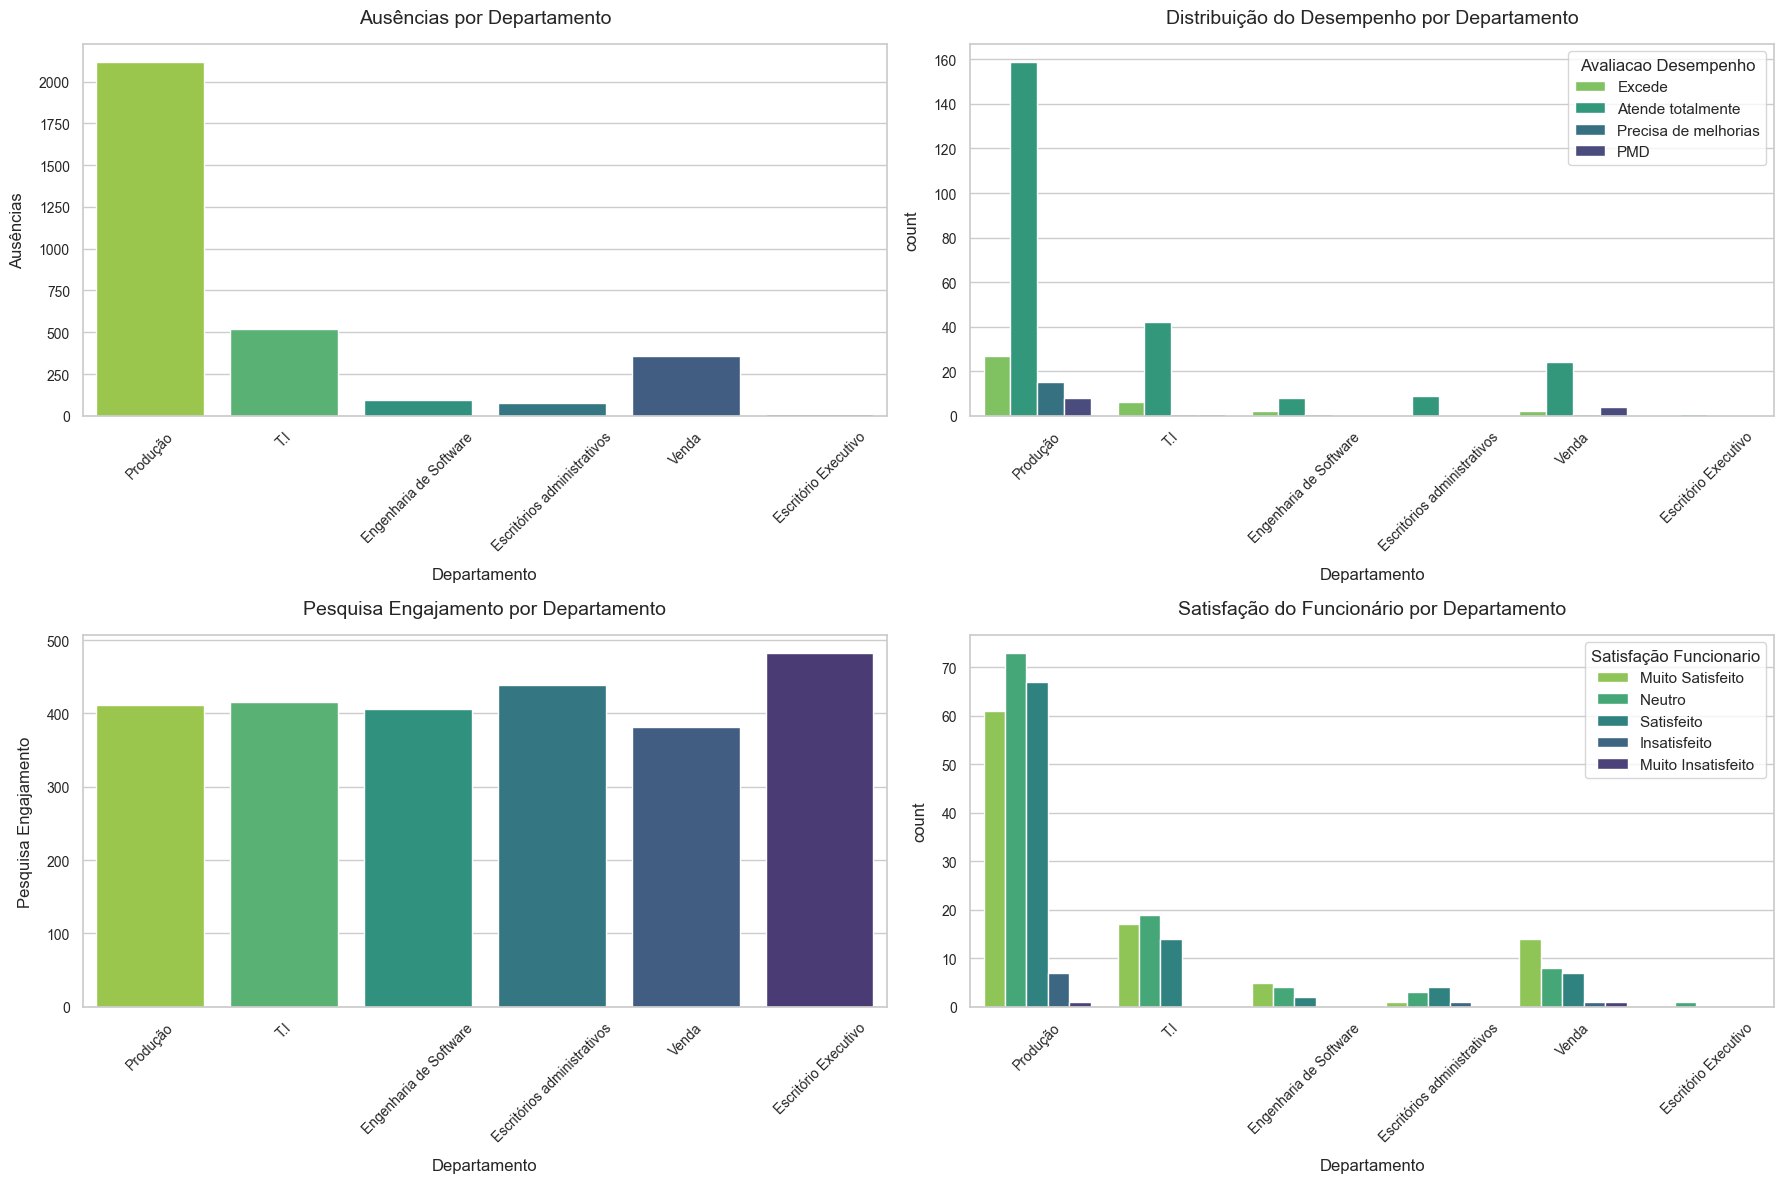

In [11]:
fig, axes = plt.subplots(2,2,figsize=(18, 12))  


sns.barplot(data=dfCopy, x='Departamento', y='Ausências', estimator=np.sum, ax=axes[0,0],ci=None, palette='viridis_r')
axes[0,0].set_title('Ausências por Departamento')
axes[0,0].tick_params(axis='x', rotation=45)

sns.countplot(
    data=dfCopy,
    x='Departamento',
    hue='Avaliacao Desempenho',
    ax=axes[0,1],
    palette='viridis_r'
)
axes[0,1].set_title('Distribuição do Desempenho por Departamento')
axes[0,1].tick_params(axis='x', rotation=45)

sns.barplot(data=dfCopy, x='Departamento', y='Pesquisa Engajamento', palette='viridis_r', estimator='mean', ax=axes[1,0],ci=None)
axes[1,0].set_title('Pesquisa Engajamento por Departamento')
axes[1,0].tick_params(axis='x', rotation=45)


sns.countplot(data=dfCopy, x='Departamento', hue='Satisfação Funcionario',    palette='viridis_r', ax=axes[1,1])
axes[1,1].set_title('Satisfação do Funcionário por Departamento')
axes[1,1].tick_params(axis='x', rotation=45)




plt.tight_layout()
plt.show()

C:\Users\compu\AppData\Local\Temp\ipykernel_18584\4056024590.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dfDesligados, x='Departamento', y='Salario', estimator='mean', palette='viridis_r',ax=axes[0],ci=None)
C:\Users\compu\AppData\Local\Temp\ipykernel_18584\4056024590.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dfDesligados, x='Departamento', y='Salario', estimator='mean', palette='viridis_r',ax=axes[0],ci=None)


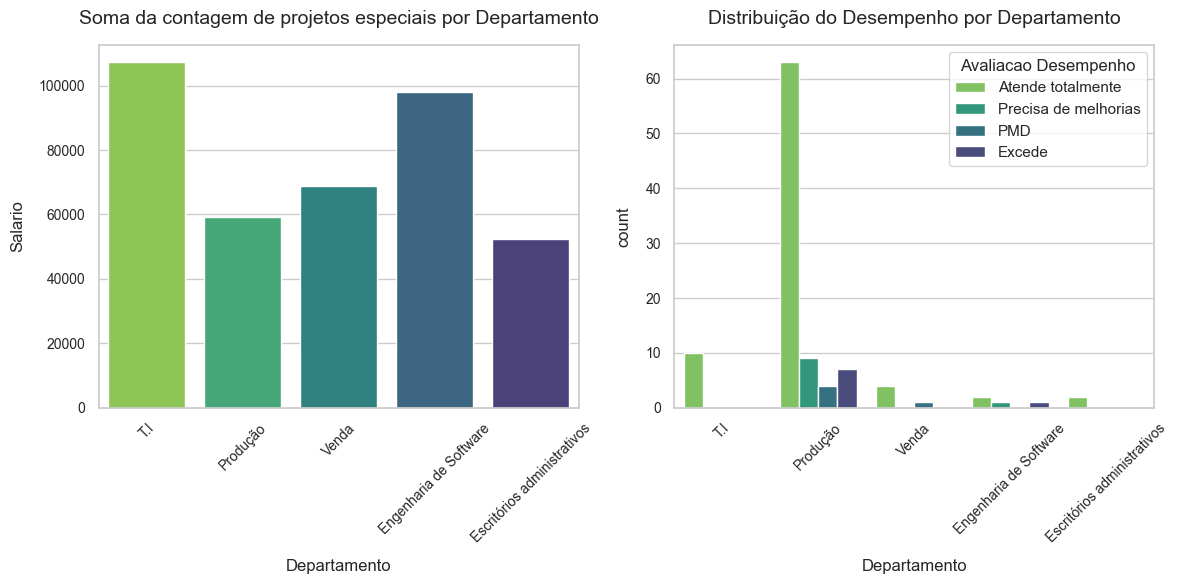

In [12]:
#Media Salarial dos que saem vs os que ficam
fig, axes = plt.subplots(1,2,figsize=(12, 6)) 
dfDesligados = dfCopy[dfCopy['IDesligado'] == 1] 
dfAtivos = dfCopy[dfCopy['IDesligado'] == 0] 

sns.barplot(data=dfDesligados, x='Departamento', y='Salario', estimator='mean', palette='viridis_r',ax=axes[0],ci=None)
axes[0].set_title('Soma da contagem de projetos especiais por Departamento')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(
    data=dfDesligados,
    x='Departamento',
    hue='Avaliacao Desempenho',
    ax=axes[1],
    palette='viridis_r'
)
axes[1].set_title('Distribuição do Desempenho por Departamento')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Correlação entre Variáveis

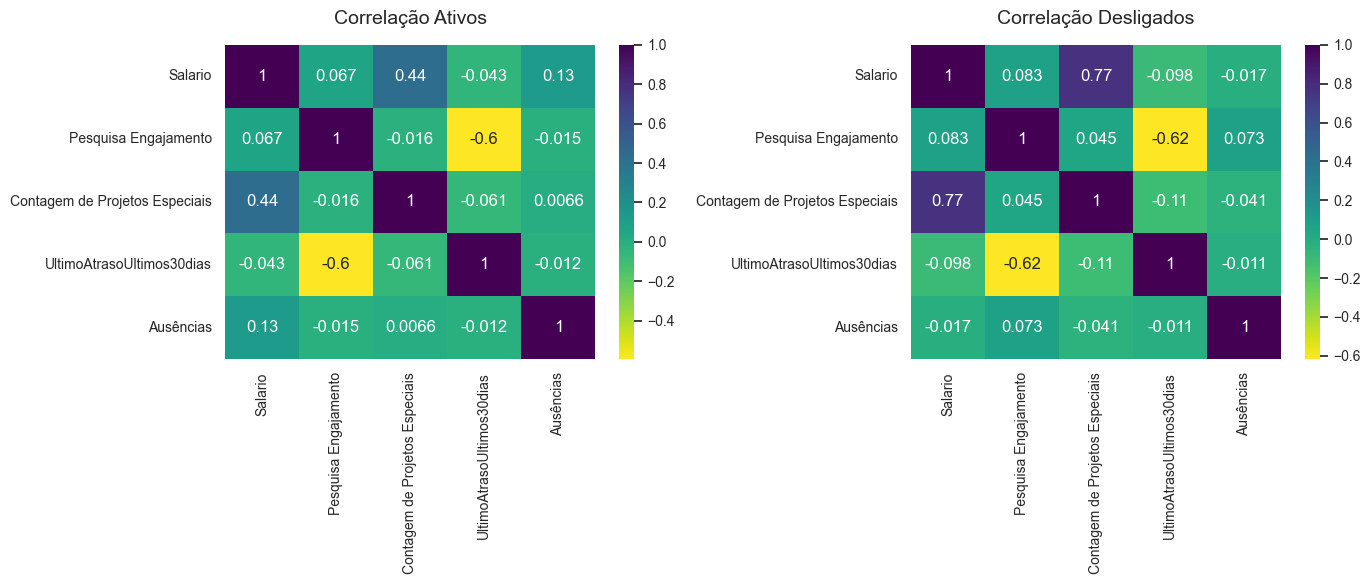

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

colunas_para_remover = ['IDFuncionario', 'IDCasado', 'IDStatusConjulgal',
                        'IDGenero', 'IDStatusFuncionario', 'IDepartamento',
                        'IDPontuacaoDesempenho', 'IDRecrutamentoDiversidade',
                        'IDesligado', 'IDCargo','IDGestor','CEP']

dfDesligados = dfDesligados.drop(columns=colunas_para_remover, errors='ignore')
dfAtivos = dfAtivos.drop(columns=colunas_para_remover, errors='ignore')

sns.heatmap(dfAtivos.select_dtypes(include=['float64', 'int64']).corr(), 
            annot=True, cmap='viridis_r', ax=axes[0])
axes[0].set_title("Correlação Ativos")

sns.heatmap(dfDesligados.select_dtypes(include=['float64', 'int64']).corr(), 
            annot=True, cmap='viridis_r', ax=axes[1])
axes[1].set_title("Correlação Desligados")

plt.tight_layout()
plt.show()


### Motivo de Rescisão

C:\Users\compu\AppData\Local\Temp\ipykernel_18584\2951518917.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=motivos_contagem.head(10), x='Frequência', y='Motivo', palette='viridis', ax=axes[0,1])
C:\Users\compu\AppData\Local\Temp\ipykernel_18584\2951518917.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dfDesligados, x='Departamento', y='Pesquisa Engajamento', palette='viridis_r', estimator='mean', ax=axes[1,0],ci=None)
C:\Users\compu\AppData\Local\Temp\ipykernel_18584\2951518917.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dfDesligados, x='Departamento', y='Pesquisa Engajamento', palette='viridi

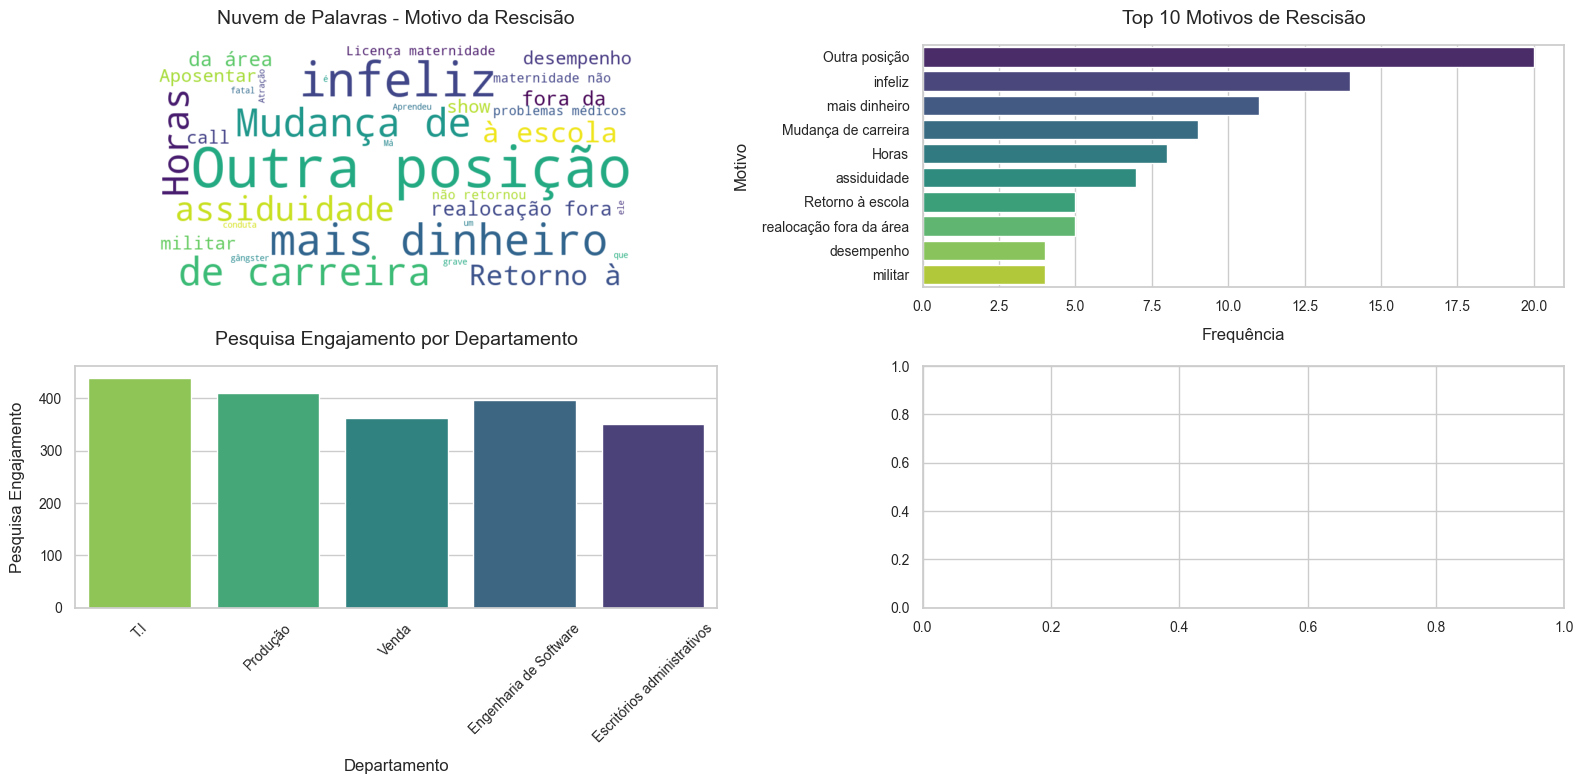

In [14]:
# Gera o texto para a nuvem de palavras
text = " ".join(dfDesligados['MotivRecisao'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Cria contagem dos motivos
motivos_contagem = dfDesligados['MotivRecisao'].dropna().astype(str).value_counts().reset_index()
motivos_contagem.columns = ['Motivo', 'Frequência']

# Cria os subplots lado a lado
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Nuvem de palavras
axes[0,0].imshow(wordcloud, interpolation='bilinear')
axes[0,0].axis('off')
axes[0,0].set_title("Nuvem de Palavras - Motivo da Rescisão")

# Gráfico de barras
sns.barplot(data=motivos_contagem.head(10), x='Frequência', y='Motivo', palette='viridis', ax=axes[0,1])
axes[0,1].set_title("Top 10 Motivos de Rescisão")
axes[0,1].set_xlabel("Frequência")
axes[0,1].set_ylabel("Motivo")


sns.barplot(data=dfDesligados, x='Departamento', y='Pesquisa Engajamento', palette='viridis_r', estimator='mean', ax=axes[1,0],ci=None)
axes[1,0].set_title('Pesquisa Engajamento por Departamento')
axes[1,0].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Hipóteses de Alta rotatividade

- Idade e Carga Técnico: Muitos jovens podem ver o cargo como temporário (ex: antes de faculdade, serviço militar, ou como primeiro emprego)
- Carga de projetos em T.I. vs Faixa Salarial: A quantidade de projetos especiais pode ter influência com possível insatisfação salarial,
- Engajamento x Atraso: A correlação negativa mostra uma desmotivação ativa antes do desligamento do colaborador.
- Pesquisa de Engajamento: Percebece que a métrica pode não estar capturando os dados de forma realista. Sugiro uma reavaliação da pesquisa de engajamento



### Validação de Hipóteses da Alta Rotatividade

In [15]:
dfDesligados[['ANIV','Data Contratação']].head()

,ANIV,Data Contratação
1,05/05/75,3/30/2015
2,09/19/88,7/5/2011
4,09/08/89,7/11/2011
10,01/12/74,1/10/2011
11,02/21/74,4/2/2012


In [22]:
# Lista para armazenar os resultados
datas_formato_especifico = []

# Primeiro encontre as datas no formato nn/nn/nn
for i, data in enumerate(dfDesligados['ANIV']):
    if re.match(r'\d{2}/\d{2}/\d{2}$', str(data)):
        datas_formato_especifico.append((i, data))

# Agora modifique cada data encontrada no DataFrame
for indice, data_antiga in datas_formato_especifico:
    data_str = str(data_antiga)
    # Dividir a data em partes
    dia_mes, ano = data_str[:6], data_str[6:]
    # Criar a nova data com "19" antes do ano
    nova_data = f"{dia_mes}19{ano}"
    # Atualizar no DataFrame
    dfDesligados.at[indice, 'ANIV'] = nova_data

C:\Users\compu\AppData\Local\Temp\ipykernel_18584\2867632678.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dfDesligados['IdadeContratacao'], bins=20, kde=True, palette='viridis')


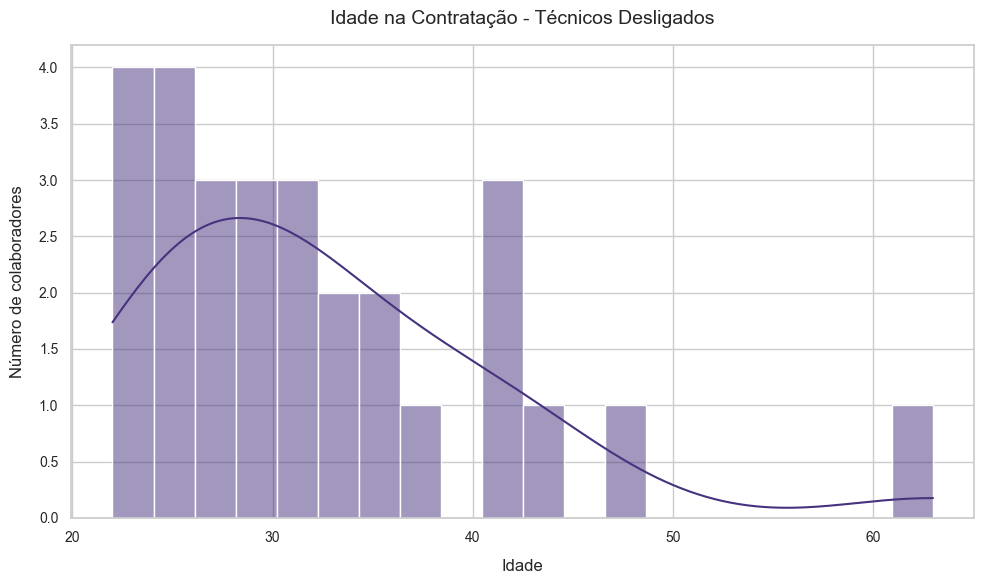

In [30]:
# Calcular idade na contratação
dfDesligados['AnoContratacao'] = pd.to_datetime(dfDesligados['Data Contratação'], errors='coerce').dt.year
dfDesligados['AnoNascimento'] = pd.to_datetime(dfDesligados['ANIV'], errors='coerce').dt.year
dfDesligados['IdadeContratacao'] = dfDesligados['AnoContratacao'] - dfDesligados['AnoNascimento']

# tecnicos_desligados = dfDesligados[
#     (dfDesligados['Cargo'].str.contains("Técnico", case=False, na=False)) &
#     (dfDesligados['IdadeContratacao'].between(16, 70))
# ]

# Plotar
plt.figure(figsize=(10,6))
sns.histplot(dfDesligados['IdadeContratacao'], bins=20, kde=True, palette='viridis')
plt.title("Idade na Contratação - Técnicos Desligados")
plt.xlabel("Idade")
plt.ylabel("Número de colaboradores")
plt.tight_layout()
plt.show()


C:\Users\compu\AppData\Local\Temp\ipykernel_18584\2819340879.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfCopy, x='Departamento', y='Contagem de Projetos Especiais', palette='viridis_r')


<Axes: xlabel='Departamento', ylabel='Contagem de Projetos Especiais'>

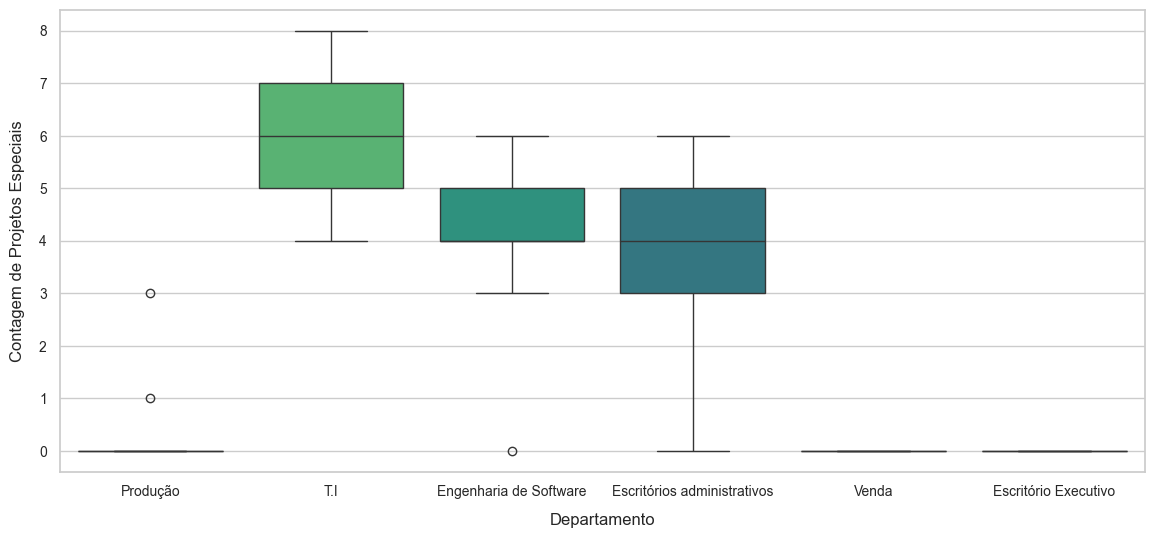

In [33]:
plt.figure(figsize=(14,6))
sns.boxplot(data=dfCopy, x='Departamento', y='Contagem de Projetos Especiais', palette='viridis_r')


<Axes: xlabel='Salario', ylabel='Pesquisa Engajamento'>

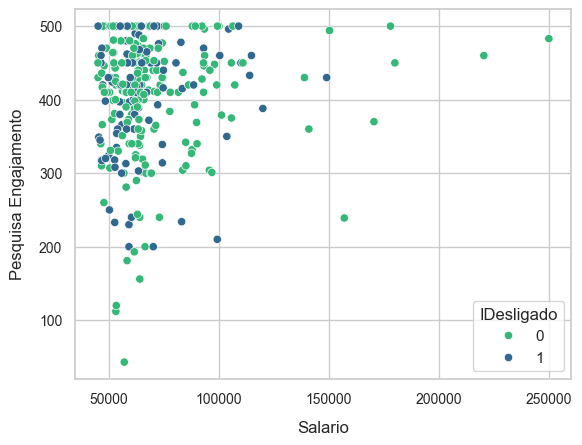

In [34]:
sns.scatterplot(data=dfCopy, x='Salario', y='Pesquisa Engajamento', hue='IDesligado',palette='viridis_r')


---

## Diferenças de desempenho entre funcionários

In [ ]:
desempenho = dfCopy['Avaliacao Desempenho'].value_counts()

Avaliacao Desempenho
Atende totalmente       243
Excede                   37
Precisa de melhorias     18
PMD                      13
Name: count, dtype: int64

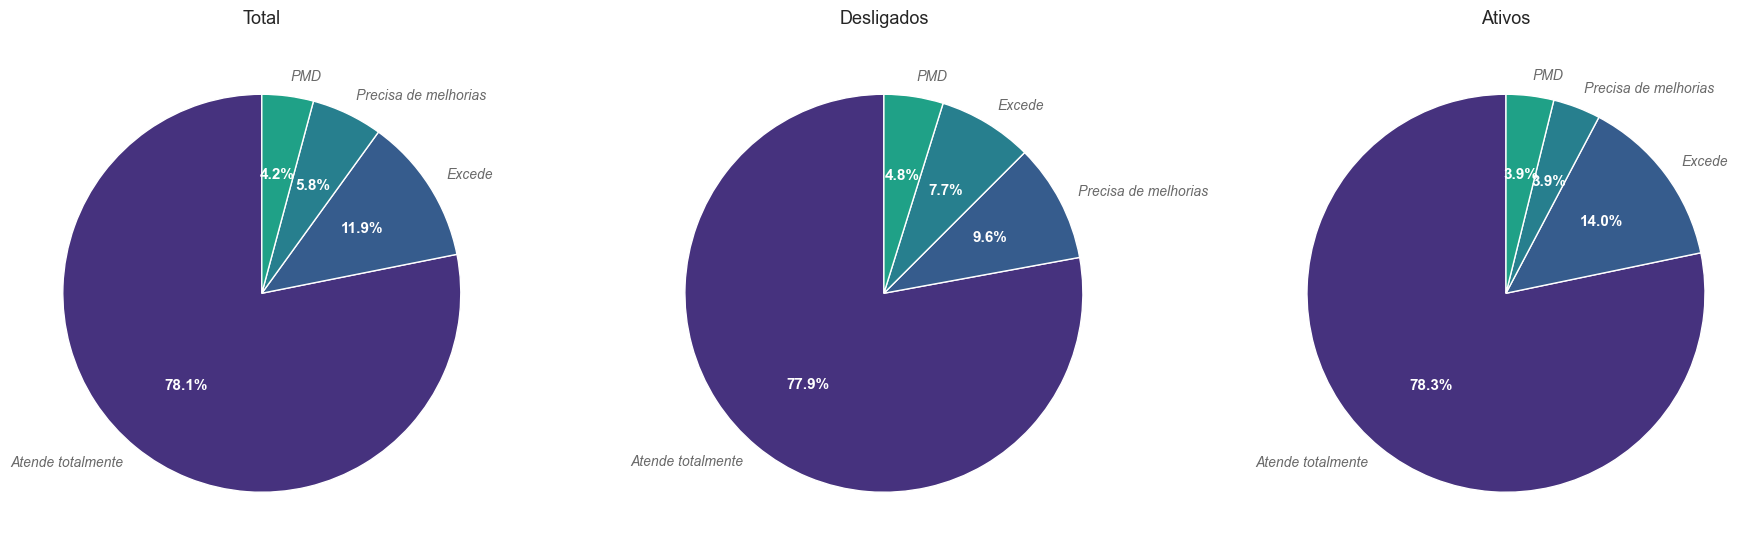

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

def formatar_pizza(ax, valores, titulo):
    wedges, texts, autotexts = ax.pie(
        valores,
        labels=valores.index,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={"linewidth": 1, "edgecolor": "white"},
        textprops={'fontsize': 10, 'color': 'black'} 
    )
    
    # Estilizar apenas os números (autotexts)
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(11)
        autotext.set_fontweight('bold')

    # Estilizar apenas os nomes das fatias (texts)
    for text in texts:
        text.set_color('dimgray')
        text.set_fontsize(10)
        text.set_fontstyle('italic')
    
    ax.set_title(titulo, fontsize=13)

# Total
formatar_pizza(axes[0], dfCopy['Avaliacao Desempenho'].value_counts(), "Total")

# Desligados
formatar_pizza(axes[1], dfCopy[dfCopy['IDesligado'] == 1]['Avaliacao Desempenho'].value_counts(), "Desligados")

# Ativos
formatar_pizza(axes[2], dfCopy[dfCopy['IDesligado'] == 0]['Avaliacao Desempenho'].value_counts(), "Ativos")

plt.tight_layout()
plt.show()



## Impacto da diversidade e recrutamento nas taxas de retenção

In [55]:
dfCopy.columns

Index(['Nome do funcionário', 'IDFuncionario', 'IDCasado', 'IDStatusConjulgal',
       'IDGenero', 'IDStatusFuncionario', 'IDepartamento',
       'IDPontuacaoDesempenho', 'IDRecrutamentoDiversidade', 'Salario',
       'IDesligado', 'IDCargo', 'Cargo', 'Estado', 'CEP', 'ANIV', 'Sexo',
       'EstadoCivil', 'Cidadania', 'Latino', 'Raca', 'Data Contratação',
       'Data Rescisão', 'MotivRecisao', 'SituaçãoEmprego', 'Departamento',
       'Nome Gestor', 'IDGestor', 'Fonte de recrutamento',
       'Avaliacao Desempenho', 'Pesquisa Engajamento',
       'Satisfação Funcionario', 'Contagem de Projetos Especiais',
       'DataUltimoFeedback', 'UltimoAtrasoUltimos30dias', 'Ausências'],
      dtype='object')

In [60]:
dfCopy['IDRecrutamentoDiversidade'].head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     0
10    1
11    1
12    1
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: IDRecrutamentoDiversidade, dtype: int64

In [61]:
indices_diversidade = ['Nome do funcionário','Estado','ANIV', 'Sexo','IDRecrutamentoDiversidade',
       'EstadoCivil', 'Cidadania', 'Latino', 'Raca', 'Data Contratação',
       'Data Rescisão', 'MotivRecisao', 'Departamento', 'Fonte de recrutamento']

indices_retencao = [
       'IDesligado', 'IDCargo', 'Cargo', 'SituaçãoEmprego', 'Departamento',
       'Nome Gestor', 'IDGestor', 'Fonte de recrutamento',
       'Avaliacao Desempenho', 'Pesquisa Engajamento',
       'Satisfação Funcionario', 'Contagem de Projetos Especiais',
       'DataUltimoFeedback', 'UltimoAtrasoUltimos30dias', 'Ausências']

In [ ]:
dfCopy[['Cidadania','Latino']].head(50)

,Cidadania,Latino
0,Cidadão americano,Não
1,Cidadão americano,Não
2,Cidadão americano,Não
3,Cidadão americano,Não
4,Cidadão americano,Não
5,Cidadão americano,Não
6,Cidadão americano,Não
7,Cidadão americano,Não
8,Cidadão americano,Não
9,Cidadão americano,Não


### Taxas de Retenção

C:\Users\compu\AppData\Local\Temp\ipykernel_18584\163330788.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=retencao_raca.values, y=retencao_raca.index, palette='viridis', ax=axes[0])
C:\Users\compu\AppData\Local\Temp\ipykernel_18584\163330788.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=retencao_por_grupo.values, y=retencao_por_grupo.index, palette='viridis', ax=axes[1])


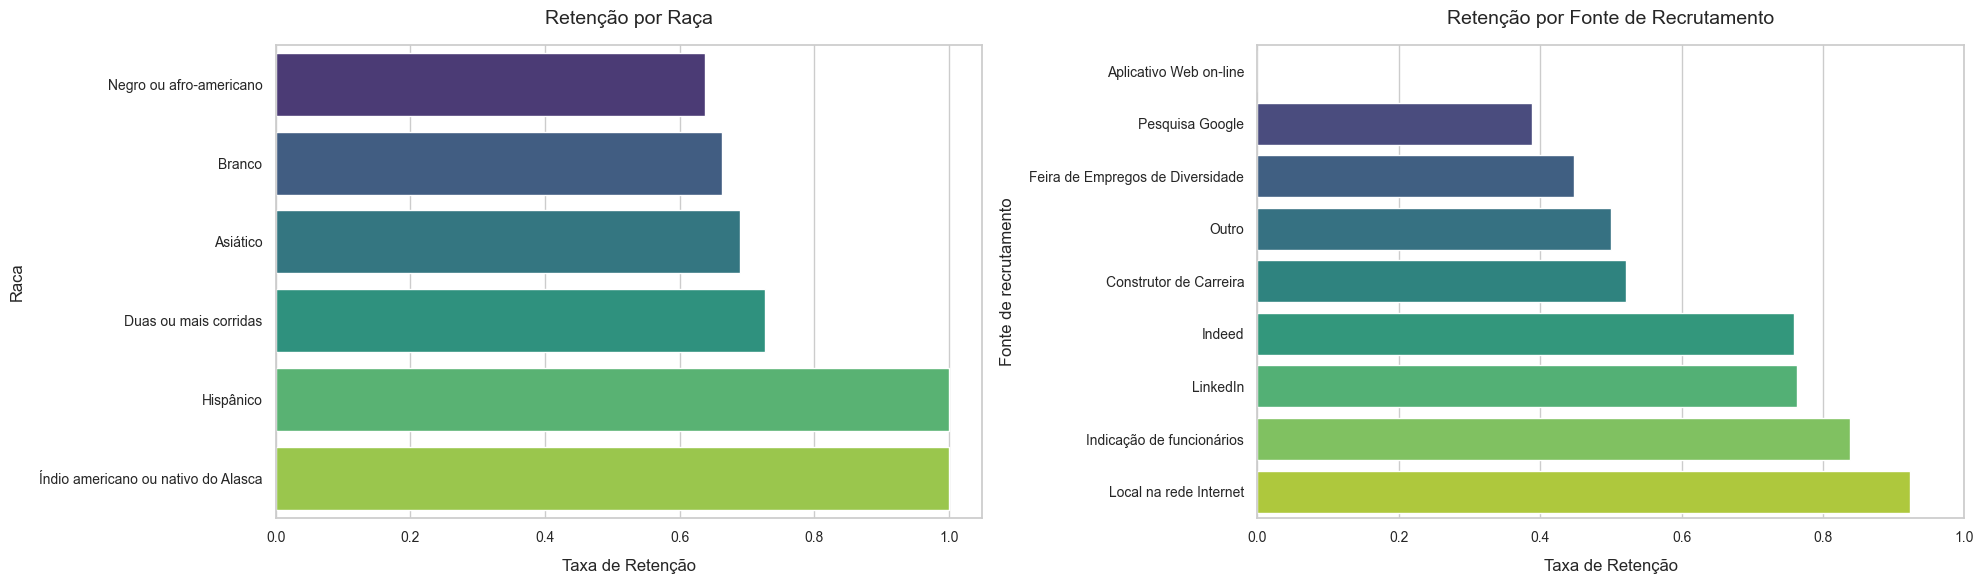

In [100]:

# Subplots: 2 linhas, 3 colunas
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

retencao_raca = dfCopy.groupby('Raca')['IDesligado'].apply(lambda x: 1 - x.mean()).sort_values()
retencao_por_grupo = dfCopy.groupby('Fonte de recrutamento')['IDesligado'].apply(lambda x: 1 - x.mean()).sort_values()
# Retenção por raça
sns.barplot(x=retencao_raca.values, y=retencao_raca.index, palette='viridis', ax=axes[0])
axes[0].set_title("Retenção por Raça")
axes[0].set_xlabel("Taxa de Retenção")


# Retenção por fonte de recrutamento
sns.barplot(x=retencao_por_grupo.values, y=retencao_por_grupo.index, palette='viridis', ax=axes[1])
axes[1].set_title("Retenção por Fonte de Recrutamento")
axes[1].set_xlabel("Taxa de Retenção")
axes[1].set_xlim(0, 1)



plt.tight_layout()
plt.show()



C:\Users\compu\AppData\Local\Temp\ipykernel_18584\3524530924.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=retencao_por_nacionalidade.values, y=retencao_por_nacionalidade.index, palette='viridis_r', ax=axes[0])
C:\Users\compu\AppData\Local\Temp\ipykernel_18584\3524530924.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=retencao_por_cidania.values, y=retencao_por_cidania.index, palette='viridis_r', ax=axes[1])
C:\Users\compu\AppData\Local\Temp\ipykernel_18584\3524530924.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rete

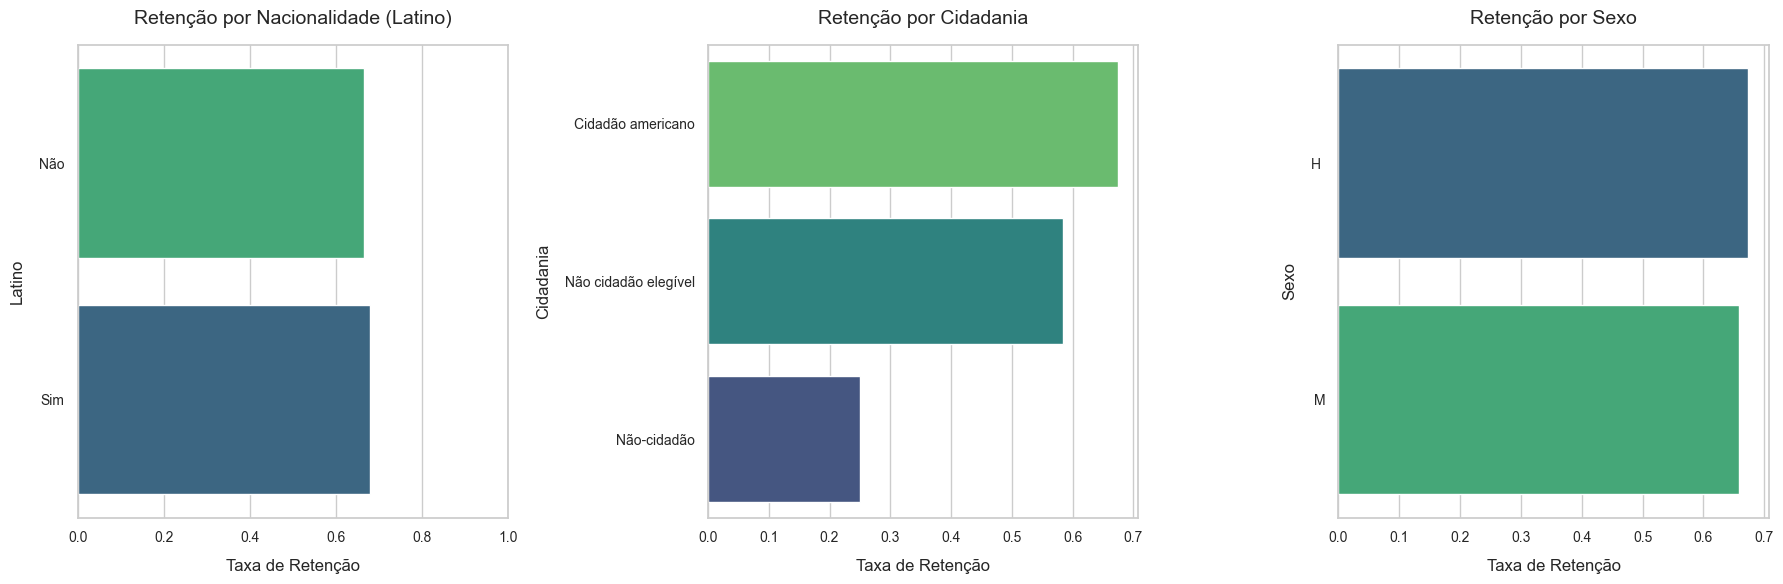

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
retencao_por_nacionalidade = dfCopy.groupby('Latino')['IDesligado'].apply(lambda x: 1 - x.mean())
retencao_por_cidania = dfCopy.groupby('Cidadania')['IDesligado'].apply(lambda x: 1 - x.mean())
retencao_por_sexo = dfCopy.groupby('Sexo')['IDesligado'].apply(lambda x: 1 - x.mean())

# Retenção por raça
# Retenção por nacionalidade (Latino)
sns.barplot(x=retencao_por_nacionalidade.values, y=retencao_por_nacionalidade.index, palette='viridis_r', ax=axes[0])
axes[0].set_title("Retenção por Nacionalidade (Latino)")
axes[0].set_xlabel("Taxa de Retenção")
axes[0].set_xlim(0, 1)

# Retenção por cidadania
sns.barplot(x=retencao_por_cidania.values, y=retencao_por_cidania.index, palette='viridis_r', ax=axes[1])
axes[1].set_title("Retenção por Cidadania")
axes[1].set_xlabel("Taxa de Retenção")

# Retenção por sexo
sns.barplot(x=retencao_por_sexo.values, y=retencao_por_sexo.index, palette='viridis', ax=axes[2])
axes[2].set_title("Retenção por Sexo")
axes[2].set_xlabel("Taxa de Retenção")


plt.tight_layout()
plt.show()
